# Pandas


## Importacion y primeros pasos 

In [17]:
import pandas as pd

#crear un DataFrame vacio
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


## Estructuras de datos

In [18]:
#Serie: es una estructura de datos unidimencional similar a un array
data = [1, 2, 3, 4, 5]
s = pd.Series(data)
print(s)
print('\n')
#series con indices personalizados
s = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


a    1
b    2
c    3
d    4
e    5
dtype: int64


In [19]:
#DataFrame es una estructura de datos bidimencional similar a una tabla en una base de datos 
dataFrame = {
    'nombre': ['Ana', 'Luis', 'Carlos'],
    'edad': [22, 34, 45],
    'ciudad': ['Madriid', 'Barcelona', 'Valencia']
}

df = pd.DataFrame(dataFrame)
print(df)

   nombre  edad     ciudad
0     Ana    22    Madriid
1    Luis    34  Barcelona
2  Carlos    45   Valencia


## Operaciones basicas

In [20]:
#indexacion y seleccion
#seleccionar una columna
print(df['nombre'])
print('\n')
#seleccionar varias columnas
print(df[['nombre','edad']])
print('\n')
#seleccinar fila por indice
print(df.loc[1])
print('\n')
#seleccionar filas por posicion
print(df.iloc[1])
print('\n')
#filtrado
#filtrar filas basadas en condiciones
print(df[df['edad'] > 30])

0       Ana
1      Luis
2    Carlos
Name: nombre, dtype: object


   nombre  edad
0     Ana    22
1    Luis    34
2  Carlos    45


nombre         Luis
edad             34
ciudad    Barcelona
Name: 1, dtype: object


nombre         Luis
edad             34
ciudad    Barcelona
Name: 1, dtype: object


   nombre  edad     ciudad
1    Luis    34  Barcelona
2  Carlos    45   Valencia


## Manipulacion de datos

In [21]:
#Agregar y eliminar columnas
#agregar nueva columna
df['salario'] = [30000, 40000, 50000]
print(df)
print('\n')
#eliminara una columna
df = df.drop('salario', axis=1)
print(df)
print('\n')
#maipular indices
#establecer una columna como indice
df = df.set_index('nombre')
print(df)
print('\n')
#resetear el indice
df = df.reset_index()
print(df)

   nombre  edad     ciudad  salario
0     Ana    22    Madriid    30000
1    Luis    34  Barcelona    40000
2  Carlos    45   Valencia    50000


   nombre  edad     ciudad
0     Ana    22    Madriid
1    Luis    34  Barcelona
2  Carlos    45   Valencia


        edad     ciudad
nombre                 
Ana       22    Madriid
Luis      34  Barcelona
Carlos    45   Valencia


   nombre  edad     ciudad
0     Ana    22    Madriid
1    Luis    34  Barcelona
2  Carlos    45   Valencia


## Operaciones avanzadas

In [22]:
#Agrupamiento
dataF = {
    'departameneto': ['ventas', 'ventas', 'marketing', 'marketing'],
    'empleado': ['Ana', 'Luis', 'Carlos', 'Pedro'],
    'salario': [30000, 32000, 45000, 47000]
}

df = pd.DataFrame(dataF)

#agrupar por departamento y calcular el salario promedio
print(df.groupby('departameneto')['salario'].mean())
print('\n')
#operaciones de Merge y Join
data1 = {
    'ID': [1, 2, 3],
    'nombre': ['Ana', 'Luis', 'Carlos']
}

df1 = pd.DataFrame(data1)

data2 = {
    'ID': [1, 2, 3],
    'salario': [30000, 32000, 45000]
}

df2 = pd.DataFrame(data2)

#merge por columna comuun ID
df_merget = pd.merge(df1, df2, on='ID')
print(df_merget)


departameneto
marketing    46000.0
ventas       31000.0
Name: salario, dtype: float64


   ID  nombre  salario
0   1     Ana    30000
1   2    Luis    32000
2   3  Carlos    45000


## Tratamiento de datos faltantes

In [26]:
#Identificacion y eliminacion
#dataFrame con valores faltantes
data_faltante = {
    'nombre': ['Ana', 'Luis', None],
    'edad': [22, None, 45]
}

df = pd.DataFrame(data_faltante)

#identificar valores faltantes
print(df.isna())
print('\n')
#eliminar filas con valores faltantes
df = df.dropna()
print(df)
print('\n')
#rellenar valores faltantes con un valor especifico
df = df.fillna({'edad': df['edad'].mean()})
print(df)


   nombre   edad
0   False  False
1   False   True
2    True  False


  nombre  edad
0    Ana  22.0


  nombre  edad
0    Ana  22.0


## Analisis de datos

In [28]:
#estadisticas descriptivas
data = {
    'edad': [22, 34, 45, 29, 42, 24, 21, 19]
}

df = pd.DataFrame(data)

print(df.describe())

            edad
count   8.000000
mean   29.500000
std     9.899495
min    19.000000
25%    21.750000
50%    26.500000
75%    36.000000
max    45.000000


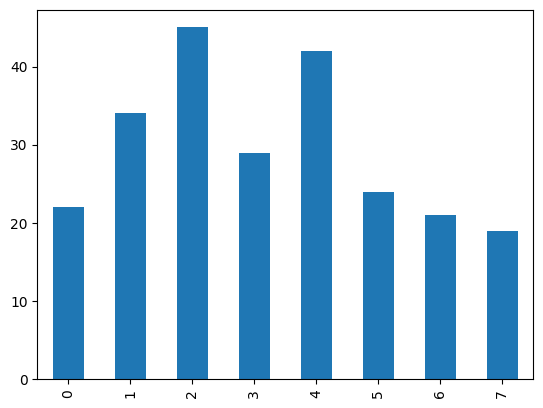

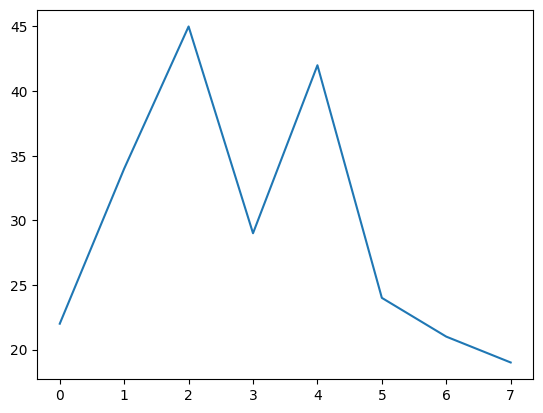

In [31]:
#visualizacion con pandas
import matplotlib.pyplot as plt

#grafico de barras
df['edad'].plot(kind='bar')
plt.show()

#grafico de lineas
df['edad'].plot(kind='line')
plt.show()


## Lectura y escritura de archivos

In [32]:
#leer archivos CSV
df = pd.read_csv('titanic/train.csv')
print(df)
print('\n')
#escribir archivo CSV
df.to_csv('nuevo_archivo.csv', index=False)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 